In [1]:
from dotenv import load_dotenv
from typing import TypedDict 
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI

In [2]:
load_dotenv()

True

In [3]:
llm = ChatGoogleGenerativeAI(
    model = "gemini-2.5-flash-lite", 
    temperature = 0.3 
)

In [4]:
class Blog_state(TypedDict):

    title:str
    outline:str 
    blog:str

In [5]:
def generate_outline(state:Blog_state) -> Blog_state:

    title = state['title']

    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    state['outline'] = llm.invoke(prompt).content  

    return state 

In [6]:
def generate_blog(state:Blog_state) -> Blog_state:
    
    title = state['title']
    outline = state['outline']

    prompt = f'Write a blog on the title - {title} using the following outline \n {outline}'
    state['blog'] = llm.invoke(prompt)

    return state 

In [7]:
graph = StateGraph(Blog_state)

graph.add_node("generate_outline" , generate_outline)
graph.add_node("generate_blog" , generate_blog)


graph.add_edge(START , "generate_outline")

graph.add_edge("generate_outline", "generate_blog")

graph.add_edge("generate_blog" , END)

workflow = graph.compile()

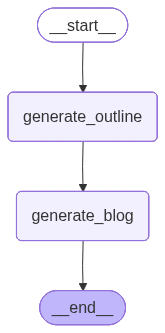

In [8]:
workflow

In [9]:
initial_state = {"title":"Black Hole"}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Black Hole', 'outline': '## Blog Post Outline: Unveiling the Mysteries of Black Holes\n\n**Target Audience:** Curious individuals with a general interest in science and space, no prior astrophysics knowledge required.\n\n**Overall Tone:** Engaging, awe-inspiring, informative, and accessible. Avoid overly technical jargon where possible, or explain it clearly.\n\n**Goal:** To demystify black holes, explain their formation, properties, and significance, and spark further curiosity about the universe.\n\n---\n\n### **Blog Post Title Options (Choose one or adapt):**\n\n*   **Black Holes: The Universe\'s Ultimate Enigmas**\n*   **Journey to the Edge of Forever: Understanding Black Holes**\n*   **Beyond the Event Horizon: What We Know (and Don\'t Know) About Black Holes**\n*   **The Cosmic Vacuum Cleaners: A Beginner\'s Guide to Black Holes**\n\n---\n\n### **I. Introduction: Hooking the Reader (Approx. 150-200 words)**\n\n*   **A. The Allure of the Unknown:**\n    *   Start with a

In [10]:
print(final_state['outline'])

## Blog Post Outline: Unveiling the Mysteries of Black Holes

**Target Audience:** Curious individuals with a general interest in science and space, no prior astrophysics knowledge required.

**Overall Tone:** Engaging, awe-inspiring, informative, and accessible. Avoid overly technical jargon where possible, or explain it clearly.

**Goal:** To demystify black holes, explain their formation, properties, and significance, and spark further curiosity about the universe.

---

### **Blog Post Title Options (Choose one or adapt):**

*   **Black Holes: The Universe's Ultimate Enigmas**
*   **Journey to the Edge of Forever: Understanding Black Holes**
*   **Beyond the Event Horizon: What We Know (and Don't Know) About Black Holes**
*   **The Cosmic Vacuum Cleaners: A Beginner's Guide to Black Holes**

---

### **I. Introduction: Hooking the Reader (Approx. 150-200 words)**

*   **A. The Allure of the Unknown:**
    *   Start with a captivating question or statement about the mysterious natur

In [11]:
print(final_state['blog'])

content='## Black Holes: The Universe\'s Ultimate Enigmas\n\nImagine a place where gravity is so strong, not even light – the fastest thing in the universe – can escape its clutches. A place so dense, it warps the very fabric of spacetime. These are not figments of science fiction, but very real, albeit mind-boggling, cosmic entities: black holes. For decades, they’ve captured our imaginations, appearing in countless movies and books, often depicted as cosmic vacuum cleaners. But beyond the Hollywood drama, what exactly are these enigmatic objects?\n\nIn this journey, we’ll peel back the layers of mystery surrounding black holes. We’ll explore how these celestial behemoths are born, what makes them tick, the different forms they take, and how we, from our relatively safe distance, have managed to detect these invisible giants. Prepare to be awestruck as we delve into the heart of darkness and discover the profound significance of black holes in shaping our universe.\n\n---\n\n### The B